In [127]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Get data
amz = pd.read_csv("amazon_cells_labelled.txt", delimiter='\t', header=None)
amz.columns = ['title', 'count']

In [128]:
# Try to track keywords that has relationship to negative reviews
keywords = ['no', 'don\'t', 'didn\'t', 'doesn\'t', 'not', 'junk', 'unsatisfactory']

# Convert dataframe to string
amz['title'] = amz['title'].astype(str)

# Find the keys contained in the dataframe
#for key in keywords:
    #print(amz[amz['title'].str.contains(str(key))]['title'])
#    amz[str(key)] = (amz[amz['title'].str.contains(' ' + str(key) + ' ', case=False)]['title'])
#amz

for key in keywords:
    amz[str(key)] = amz['title'].str.contains(' ' + str(key) + ' ', case=False)
amz

,title,count,no,don't,didn't,doesn't,not,junk,unsatisfactory
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,0,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False


In [129]:
# Find if message is all uppercase.
amz['allcaps'] = amz['title'].str.isupper()

In [130]:
amz['title'] = (amz['title'] == 'title')

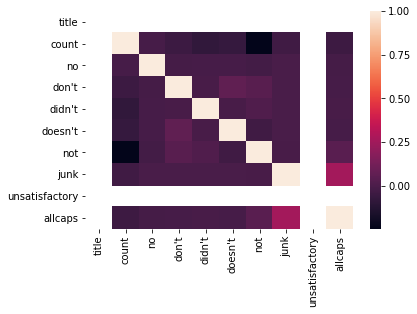

In [132]:
sns.heatmap(amz.corr())
plt.show()

In [134]:
# Build out our training data before running the model
data = amz[keywords + ['allcaps']]
target = amz['title']

In [136]:
# use the BernoulliNB classifier
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 0


C:\Users\nyejy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:461: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
